In [1]:
FILE_NAME = 'logs-resnet34.txt'
PRUNED_FILE_NAME = 'logs-resnet34.txt'
DATASET_NAME = 'fusion'
DATA_DIR = '/home/simon/Documents/Memoire/insect-thesis/data/kitti/fusion/stats/'+FILE_NAME
PRUNED_DIR = '/home/simon/Documents/Memoire/insect-thesis/data/kitti/fusion/stats/'+PRUNED_FILE_NAME
OUTPUT_DIR = '/home/simon/Documents/Memoire/insect-thesis/data/kitti/fusion/stats/'
#DATA_DIR = '/workspace/tlt-experiments/insect-thesis/data/kitti/'+DATASET_NAME+'/stats/'+FILE_NAME
#PRUNED_DIR = '/workspace/tlt-experiments/insect-thesis/data/kitti/'+DATASET_NAME+'/stats/'+FILE_NAME
#OUTPUT_DIR = '/workspace/tlt-experiments/insect-thesis/data/kitti/'+DATASET_NAME+'/stats/'

In [2]:
#Extracting the values from the file
import os
import re
import matplotlib.pyplot as plt
import numpy as np

losses = [] 
aps_per_epoch = []
precisions_per_epoch = []
recalls_per_epoch = []
rpns_per_epoch = []
class_names = []
number_epochs = 0
regex_start = re.compile("[0-9]+/[0-9]+")
regex_loss = re.compile("- loss: [0-9].[0-9]+")
regex_start2 = re.compile("Class")
with open(DATA_DIR) as f:
    while True:
        line = f.readline()
        
        if not line:
            break
        
        if regex_start.match(line):
            match = regex_loss.search(line)
            if match:
                match = match.group()
                _, loss_str = match.split(":")
                loss = float(loss_str)
                losses.append(loss)
            
        if regex_start2.match(line):
            number_epochs += 1
                
            aps = []
            precisions = []
            recalls = []
            rpns = []
            if not class_names:
                names = []
            
            line = f.readline()
            while "mAP@" not in line:
                name, ap, precision, recall, rpn = line. split()
                aps.append(ap)
                precisions.append(precision)
                recalls.append(recall)
                rpns.append(rpn)
                if not class_names:
                    names.append(name)
                line = f.readline()
            
            aps_per_epoch.append(aps)
            precisions_per_epoch.append(precisions)
            recalls_per_epoch.append(recalls)
            rpns_per_epoch.append(rpns)
            if not class_names:
                class_names = names          

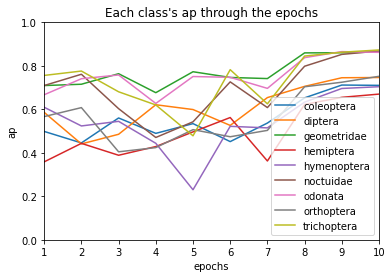

In [3]:
#ap graph
x = range(1,number_epochs+1)

for idx,name in enumerate(class_names):
    aps = [float(ap[idx]) for ap in aps_per_epoch]
    plt.plot(x, aps, label = name)
    
axes = plt.gca() 
plt.xlabel('epochs')
plt.ylabel('ap')
plt.title('Each class\'s ap through the epochs')
axes.set_xlim((1,number_epochs))
axes.set_ylim(ymin=0.0, ymax=1.0)
axes.set_xbound(lower=1, upper=number_epochs)
axes.set_ybound(lower=0.0, upper=1.0)
plt.legend()
plt.show()

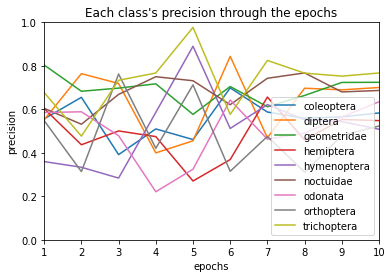

In [4]:
#precision graph
x = range(1,number_epochs+1)

for idx,name in enumerate(class_names):
    precisions = [float(precision[idx]) for precision in precisions_per_epoch]
    plt.plot(x, precisions, label = name)
    
axes = plt.gca() 
plt.xlabel('epochs')
plt.ylabel('precision')
plt.title('Each class\'s precision through the epochs')
axes.set_xlim((1,number_epochs))
axes.set_ylim(ymin=0.0, ymax=1.0)
axes.set_xbound(lower=1, upper=number_epochs)
axes.set_ybound(lower=0.0, upper=1.0)
plt.legend()
plt.show()

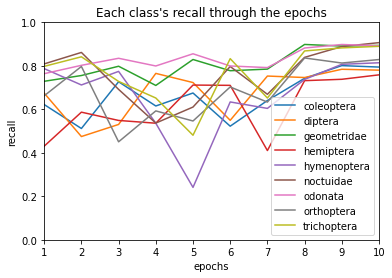

In [5]:
#recall graph
x = range(1,number_epochs+1)

for idx,name in enumerate(class_names):
    recalls = [float(recall[idx]) for recall in recalls_per_epoch]
    plt.plot(x, recalls, label = name)
    
axes = plt.gca() 
plt.xlabel('epochs')
plt.ylabel('recall')
plt.title('Each class\'s recall through the epochs')
axes.set_xlim((1,number_epochs))
axes.set_ylim(ymin=0.0, ymax=1.0)
axes.set_xbound(lower=1, upper=number_epochs)
axes.set_ybound(lower=0.0, upper=1.0)
plt.legend()
plt.show()

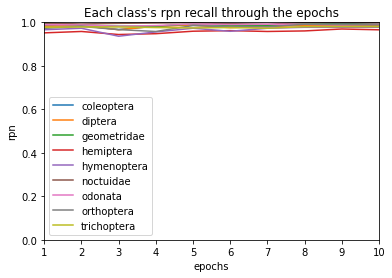

In [6]:
#rpn graph
x = range(1,number_epochs+1)

for idx,name in enumerate(class_names):
    rpns = [float(rpn[idx]) for rpn in rpns_per_epoch]
    plt.plot(x, rpns, label = name)
    
axes = plt.gca() 
plt.xlabel('epochs')
plt.ylabel('rpn')
plt.title('Each class\'s rpn recall through the epochs')
axes.set_xlim((1,number_epochs))
axes.set_ylim(ymin=0.0, ymax=1.0)
axes.set_xbound(lower=1, upper=number_epochs)
axes.set_ybound(lower=0.0, upper=1.0)
plt.legend()
plt.show()

In [7]:
print(losses)
print(len(losses))
print(number_epochs)

ratio_loss_epochs = len(losses) / number_epochs
x_axis = np.linspace(1, number_epochs+1, num=len(losses), endpoint=False, retstep=False, dtype=float, axis=0)

print(ratio_loss_epochs)
print(x_axis)

[0.3657, 0.3102, 0.3005, 0.2917, 0.2733, 0.3607, 0.3354, 0.2765, 0.239, 0.2304]
10
10
1.0
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


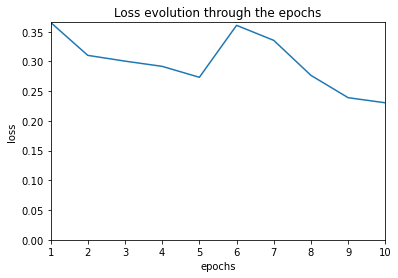

In [8]:
ratio_loss_epochs = len(losses) / number_epochs
x_axis = np.linspace(1, number_epochs+1, num=len(losses), endpoint=False, retstep=False, dtype=float, axis=0)
    
axes = plt.gca() 
plt.plot(x_axis, losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss evolution through the epochs')
axes.set_xlim((1,number_epochs))
axes.set_ylim(ymin=0.0, ymax=np.max(losses))
axes.set_xbound(lower=1, upper=number_epochs)
axes.set_ybound(lower=0.0, upper=np.max(losses))
plt.show()

In [10]:
print(np.linspace(100,9362,10,dtype=int))

[ 100 1129 2158 3187 4216 5245 6274 7303 8332 9362]
